In [410]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

data = pd.read_csv('student_data.csv')

features = data.drop('admit', axis = 1)
target = data['admit']

<IPython.core.display.Javascript object>


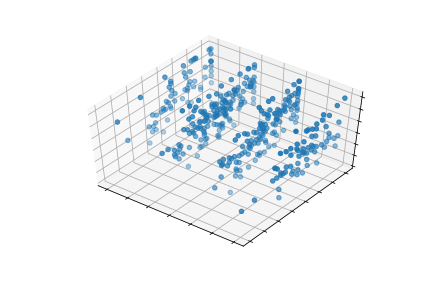

<function matplotlib.pyplot.show(*args, **kw)>

In [411]:
from mpl_toolkits.mplot3d import axes3d
x = data['rank'].values
y = data['gpa'].values
z = data['gre'].values
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(x,y,z)
    
plt.show

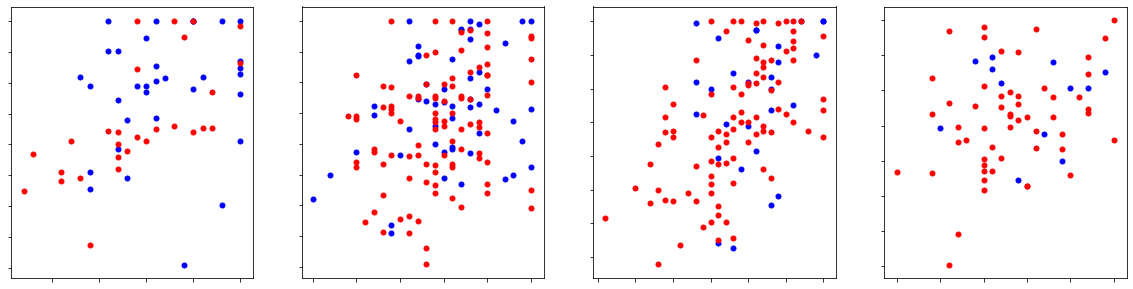

In [408]:
%matplotlib inline
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20,5))

for r in range(1,5):
    df = data[data["rank"]==r]
    X = df[['gre','gpa']].values
    y = df['admit'].values
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    ax[r-1].scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'blue')
    ax[r-1].scatter([s[0][0] for s in rejected],[s[0][1] for s in rejected], s = 25, color = 'red')
    ax[r-1].set_title(str('rank'+ str(r)))
    plt.show
    

In [358]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['gre', 'gpa']
features_minmax_transform[numerical] = scaler.fit_transform(features[numerical])

one_hot_data = pd.get_dummies(features_minmax_transform['rank'])

features_final = pd.concat([features_minmax_transform, one_hot_data], axis = 1).drop('rank',axis = 1)

features_final.head()

,gre,gpa,1,2,3,4
0,0.275862,0.775862,0,0,1,0
1,0.758621,0.810345,0,0,1,0
2,1.000000,1.000000,1,0,0,0
3,0.724138,0.534483,0,0,0,1
4,0.517241,0.385057,0,0,0,1


In [ ]:
import keras
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasClassifier

features_df = features_final.values
target_df = keras.utils.to_categorical(target.values, 2)

X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.3)

print('Features are of shape {}'.format(features_df.shape))
print('target are of shape {}'.format(target_df.shape))

def model_selection(optimizer= 'rmsprop',activation= 'sigmoid', loss='categorical_crossentropy'):
    model = Sequential()
    model.add(Dense(64, activation= activation, input_shape=(6,)))
    model.add(Dense(64, activation= activation))
    model.add(Dense(2, activation= activation))
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    # model.fit(X_train, y_train, epochs=100, batch_size =100, verbose=1)
    return model

model = KerasClassifier(build_fn=model_selection, batch_size = 100, epochs = 10, verbose=0)

parameters = {
    'activation': ['relu', 'sigmoid', 'tanh', 'softmax'], 
    'loss': ['categorical_crossentropy', 'mean_squared_error'], 
    'optimizer': ['rmsprop', 'adam', 'sgd'],
    'batch_size': [100,200],
    'epochs': [100,500]}

grid_obj = GridSearchCV(estimator=model,param_grid=parameters)

grid_fit = grid_obj.fit(X_train, y_train)

Features are of shape (400, 6)
target are of shape (400, 2)


In [ ]:
import pandas as pd
results = grid_fit.cv_result